<a href="https://colab.research.google.com/github/Abhisheksaji/AI-programs/blob/main/Copy_of_Untitled15(Image%20colorization).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow
!pip install scikit-image
from tensorflow.keras.layers import Input, Dense, Conv2D, UpSampling2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import tensorflow as tf
from keras.preprocessing.image import img_to_array, load_img
from skimage.transform import resize
from skimage.io import imsave, imshow
import numpy as np
from skimage.color import rgb2lab, lab2rgb

     |████████████████████████████████| 462 kB 22.7 MB/s 


In [ ]:
path = '/content/drive/MyDrive/images/'

In [ ]:
train_datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
train = train_datagen.flow_from_directory(path, 
                                          target_size=(256, 256), 
                                          batch_size=340, 
                                          class_mode=None)

Found 161 images belonging to 11 classes.


In [ ]:
X =[]
Y =[]
for img in train[0]:
  try:
      lab = rgb2lab(img)
      X.append(lab[:,:,0]) 
      Y.append(lab[:,:,1:] / 128) #A and B values range from -127 to 128, 
      #so we divide the values by 128 to restrict values to between -1 and 1.
  except:
     print('error')
X = np.array(X)
Y = np.array(Y)
X = X.reshape(X.shape+(1,)) #dimensions to be the same for X and Y
print(X.shape)
print(Y.shape)

(161, 256, 256, 1)
(161, 256, 256, 2)


In [ ]:
SIZE = 256

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2, input_shape=(256, 256, 1)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))

In [ ]:
#Decoder
#Decoder
#Note: For the last layer we use tanh instead of Relu. 
#This is because we are colorizing the image in this layer using 2 filters, A and B.
#A and B values range between -1 and 1 so tanh (or hyperbolic tangent) is used
#as it also has the range between -1 and 1. 
#Other functions go from 0 to 1.
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))
model.compile(optimizer='adam', loss='mse' , metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       147584    
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 256)       295168    
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 512)       1180160   
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 512)       2

In [ ]:
model.fit(X,Y,validation_split=0.1, epochs=130, batch_size=16)

Epoch 1/130
9/9 [==============================] - 159s 18s/step - loss: 0.4334 - accuracy: 0.5065 - val_loss: 0.0324 - val_accuracy: 0.4591
Epoch 2/130
9/9 [==============================] - 154s 17s/step - loss: 0.0279 - accuracy: 0.3654 - val_loss: 0.0323 - val_accuracy: 0.4577
Epoch 3/130
9/9 [==============================] - 154s 17s/step - loss: 0.0281 - accuracy: 0.3632 - val_loss: 0.0318 - val_accuracy: 0.4643
Epoch 4/130
9/9 [==============================] - 149s 17s/step - loss: 0.0277 - accuracy: 0.3693 - val_loss: 0.0324 - val_accuracy: 0.5043
Epoch 5/130
9/9 [==============================] - 151s 17s/step - loss: 0.0279 - accuracy: 0.3963 - val_loss: 0.0319 - val_accuracy: 0.4609
Epoch 6/130
9/9 [==============================] - 151s 17s/step - loss: 0.0274 - accuracy: 0.3717 - val_loss: 0.0318 - val_accuracy: 0.4685
Epoch 7/130
9/9 [==============================] - 150s 17s/step - loss: 0.0277 - accuracy: 0.3707 - val_loss: 0.0321 - val_accuracy: 0.4584
Epoch 8/130
9

In [ ]:
model.save('colorize_autoencoder130.model')

INFO:tensorflow:Assets written to: colorize_autoencoder130.model/assets


In [ ]:
model = tf.keras.models.load_model('colorize_autoencoder130.model',
                                   custom_objects=None,
                                   compile=True)

In [ ]:
img1_color=[]

In [ ]:
img1=img_to_array(load_img('/content/drive/MyDrive/images/barn.png'))
img1 = resize(img1 ,(256,256))
img1_color.append(img1)

In [ ]:
img1_color = np.array(img1_color, dtype=float)
img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
img1_color = img1_color.reshape(img1_color.shape+(1,))

In [ ]:
output1 = model.predict(img1_color)
output1 = output1*128

/usr/local/lib/python3.7/dist-packages/skimage/color/colorconv.py:1109: UserWarning: Color data out of range: Z < 0 in 1 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


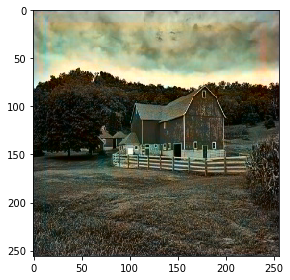

In [ ]:
result = np.zeros((256, 256, 3))
result[:,:,0] = img1_color[0][:,:,0]
result[:,:,1:] = output1[0]
imshow(lab2rgb(result))
imsave("result.png", lab2rgb(result))